In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("ecommerce_customers_unit1.csv")
df

,customer_id,age,gender,country,signup_date,last_purchase_date,num_orders,total_spent,avg_order_value,recency_days,is_premium_member,device_type,preferred_category,churned
0,10001,56.0,Male,India,2022-01-27,2024-04-27,10,13273.25,1327.32,522,0,NaN,Home,0
1,10002,69.0,Other,UK,2025-01-12,2025-08-01,10,NaN,308.90,61,0,Mobile,Grocery,0
2,10003,46.0,Female,USA,2021-04-25,2021-06-01,5,3411.83,682.37,1583,0,NaN,NaN,0
3,10004,32.0,Male,India,2021-02-23,2023-09-22,5,4502.00,900.40,740,0,NaN,NaN,0
4,10005,60.0,Female,India,2021-06-07,2021-12-11,7,3842.10,548.87,1390,0,Tablet,Books,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,10358,25.0,Female,India,2023-09-04,2025-06-18,7,NaN,0.00,105,1,Mobile,Electronics,0
601,10117,50.0,Male,USA,2024-05-11,2024-11-08,4,3640.07,910.02,327,0,Mobile,Electronics,0
602,10599,46.0,Male,India,2020-12-01,2024-06-25,6,2176.22,362.70,463,1,Desktop,Electronics,0
603,10442,32.0,Female,UK,2023-12-20,2024-09-20,3,5478.65,1826.22,376,0,Mobile,Home,0


In [4]:
df.isnull().sum().sort_values()

customer_id            0
signup_date            0
last_purchase_date     0
num_orders             0
avg_order_value        0
recency_days           0
is_premium_member      0
churned                0
preferred_category    22
age                   28
device_type           30
country               32
gender                34
total_spent           34
dtype: int64

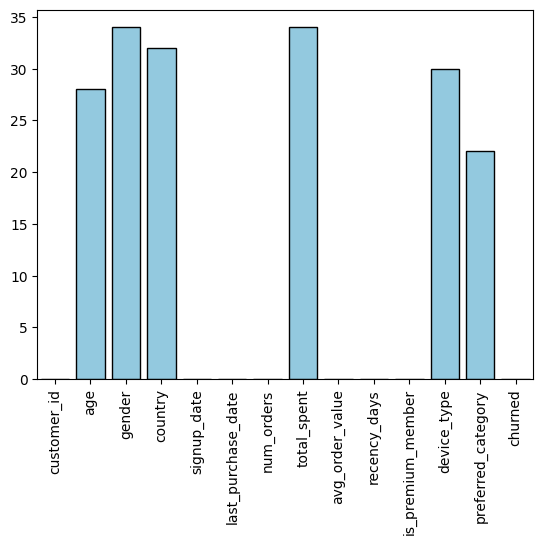

In [33]:
sns.barplot(data = df.isnull().sum(),width=0.8,color="skyblue",edgecolor="black")
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [30]:
Q1 = df.select_dtypes(include="number").quantile(0.25)
Q3 = df.select_dtypes(include="number").quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)

print("Lower Bound: \n",LB)
print("Upper Bound: \n",UB)

Outliers1 = df[(df["age"] < LB.loc["age"]) | (df["age"] > UB.loc["age"])]

Lower Bound: 
 customer_id          9701.000
age                    -4.000
num_orders             -0.500
total_spent         -4482.915
avg_order_value      -433.095
recency_days         -724.000
is_premium_member      -1.500
churned                 0.000
dtype: float64
Upper Bound: 
 customer_id          10901.000
age                     92.000
num_orders              11.500
total_spent          17926.565
avg_order_value       2843.905
recency_days          1548.000
is_premium_member        2.500
churned                  0.000
dtype: float64


In [37]:
df["age"] = df["age"].fillna(df["age"].mean())
df.isnull().sum().sort_values()

customer_id            0
age                    0
signup_date            0
last_purchase_date     0
num_orders             0
avg_order_value        0
recency_days           0
is_premium_member      0
churned                0
preferred_category    22
device_type           30
country               32
gender                34
total_spent           34
dtype: int64

Normalization (Min Max Scaling)

In [39]:
sc = (df["age"] - df["age"].min())/(df["age"].max() - df["age"].min())
sc

0      0.745098
1      1.000000
2      0.549020
3      0.274510
4      0.823529
         ...   
600    0.137255
601    0.627451
602    0.549020
603    0.274510
604    0.509804
Name: age, Length: 605, dtype: float64



Standardization (Z-score scaling)


In [40]:
z = df["age"] - df["age"].mean() / df["age"].std()
z

0      52.979991
1      65.979991
2      42.979991
3      28.979991
4      56.979991
         ...    
600    21.979991
601    46.979991
602    42.979991
603    28.979991
604    40.979991
Name: age, Length: 605, dtype: float64

Label Encoding 

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["gender"]

0      1
1      2
2      0
3      1
4      0
      ..
600    0
601    1
602    1
603    0
604    0
Name: gender, Length: 605, dtype: int64

One-Hot Encoding

In [43]:
pd.get_dummies(df,columns=["gender"])

,customer_id,age,country,signup_date,last_purchase_date,num_orders,total_spent,avg_order_value,recency_days,is_premium_member,device_type,preferred_category,churned,gender_0,gender_1,gender_2,gender_3
0,10001,56.0,India,2022-01-27,2024-04-27,10,13273.25,1327.32,522,0,NaN,Home,0,False,True,False,False
1,10002,69.0,UK,2025-01-12,2025-08-01,10,NaN,308.90,61,0,Mobile,Grocery,0,False,False,True,False
2,10003,46.0,USA,2021-04-25,2021-06-01,5,3411.83,682.37,1583,0,NaN,NaN,0,True,False,False,False
3,10004,32.0,India,2021-02-23,2023-09-22,5,4502.00,900.40,740,0,NaN,NaN,0,False,True,False,False
4,10005,60.0,India,2021-06-07,2021-12-11,7,3842.10,548.87,1390,0,Tablet,Books,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,10358,25.0,India,2023-09-04,2025-06-18,7,NaN,0.00,105,1,Mobile,Electronics,0,True,False,False,False
601,10117,50.0,USA,2024-05-11,2024-11-08,4,3640.07,910.02,327,0,Mobile,Electronics,0,False,True,False,False
602,10599,46.0,India,2020-12-01,2024-06-25,6,2176.22,362.70,463,1,Desktop,Electronics,0,False,True,False,False
603,10442,32.0,UK,2023-12-20,2024-09-20,3,5478.65,1826.22,376,0,Mobile,Home,0,True,False,False,False


In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [46]:
data = {'Age':[18,22,45,60,80],
        'Income':[2000,3000,10000,40000,80000]}
df1 = pd.DataFrame(data)

norm = MinMaxScaler()
df_norm = pd.DataFrame(norm.fit_transform(df1), columns=df1.columns)

std = StandardScaler()
df_std = pd.DataFrame(std.fit_transform(df1), columns=df1.columns)

print("Original:\n", df1)
print("\nNormalized:\n",df_norm)
print("\nStandardized:\n",df_std)

Original:
    Age  Income
0   18    2000
1   22    3000
2   45   10000
3   60   40000
4   80   80000

Normalized:
         Age    Income
0  0.000000  0.000000
1  0.064516  0.012821
2  0.435484  0.102564
3  0.677419  0.487179
4  1.000000  1.000000

Standardized:
         Age    Income
0 -1.160177 -0.836312
1 -0.988299 -0.802860
2  0.000000 -0.568692
3  0.644543  0.434882
4  1.503934  1.772982


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_cols = df.select_dtypes(include='number').columns
print("Numeric columns: ",num_cols.tolist())

Numeric columns:  ['customer_id', 'age', 'num_orders', 'total_spent', 'avg_order_value', 'recency_days', 'is_premium_member', 'churned']


In [7]:
normalizer = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = normalizer.fit_transform(df[num_cols])
print(df_normalized.head())

   customer_id       age  gender country signup_date last_purchase_date  \
0     0.000000  0.745098    Male   India  2022-01-27         2024-04-27   
1     0.001669  1.000000   Other      UK  2025-01-12         2025-08-01   
2     0.003339  0.549020  Female     USA  2021-04-25         2021-06-01   
3     0.005008  0.274510    Male   India  2021-02-23         2023-09-22   
4     0.006678  0.823529  Female   India  2021-06-07         2021-12-11   

   num_orders  total_spent  avg_order_value  recency_days  is_premium_member  \
0    0.769231     0.107136         0.116107      0.309382                0.0   
1    0.769231          NaN         0.027021      0.035629                0.0   
2    0.384615     0.027539         0.059690      0.939430                0.0   
3    0.384615     0.036338         0.078762      0.438836                0.0   
4    0.538462     0.031012         0.048012      0.824822                0.0   

  device_type preferred_category  churned  
0         NaN           

In [8]:
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])
print(df_standardized.head())

   customer_id       age  gender country signup_date last_purchase_date  \
0    -1.731715  0.790133    Male   India  2022-01-27         2024-04-27   
1    -1.725952  1.658781   Other      UK  2025-01-12         2025-08-01   
2    -1.720188  0.121942  Female     USA  2021-04-25         2021-06-01   
3    -1.714424 -0.813525    Male   India  2021-02-23         2023-09-22   
4    -1.708660  1.057409  Female   India  2021-06-07         2021-12-11   

   num_orders  total_spent  avg_order_value  recency_days  is_premium_member  \
0    1.739429     0.504370         0.042695      0.162699          -0.645648   
1    1.739429          NaN        -0.864250     -0.974240          -0.645648   
2   -0.405607    -0.449556        -0.531660      2.779384          -0.645648   
3   -0.405607    -0.344100        -0.337495      0.700340          -0.645648   
4    0.452408    -0.407935        -0.650547      2.303399          -0.645648   

  device_type preferred_category   churned  
0         NaN          